<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:36: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:36: SyntaxWarning: invalid escape sequence '\l'
C:\Users\iChin\AppData\Local\Temp\ipykernel_32932\468278941.py:35: SyntaxWarning: invalid escape sequence '\l'
  plt.axvline(lambda_min, color='blue', linestyle='--', label="Marcenko-Pastur Min ($\lambda_-$)")
C:\Users\iChin\AppData\Local\Temp\ipykernel_32932\468278941.py:36: SyntaxWarning: invalid escape sequence '\l'
  plt.axvline(lambda_max, color='green', linestyle='--', label="Marcenko-Pastur Max ($\lambda_+$)")


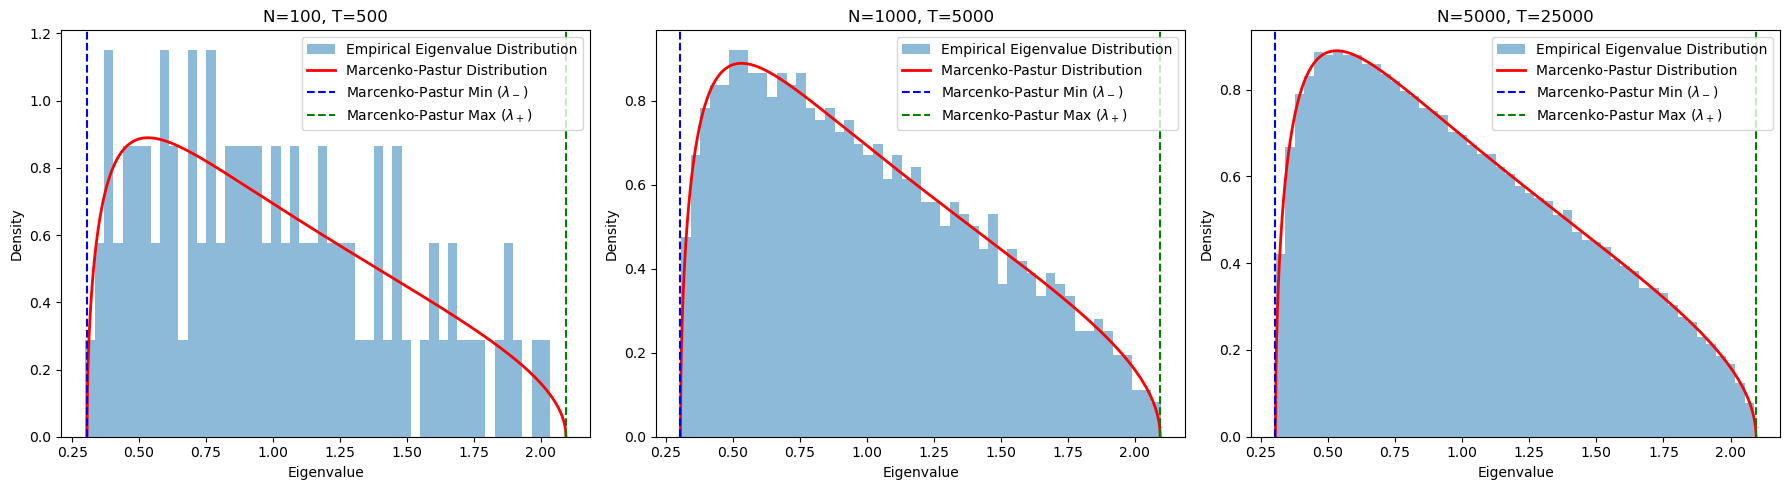

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Marcenko-Pastur PDF function
def marcenko_pastur_pdf(lambda_val, q):
    lambda_min = (1 - np.sqrt(1 / q))**2
    lambda_max = (1 + np.sqrt(1 / q))**2
    if lambda_min <= lambda_val <= lambda_max:
        return (q / (2 * np.pi * lambda_val)) * np.sqrt((lambda_max - lambda_val) * (lambda_val - lambda_min))
    else:
        return 0

# Function to generate eigenvalue distribution and plot Marcenko-Pastur distribution for given N and T
def plot_marcenko_pastur(N, T, subplot_position):
    # Generate random data for given N and T
    random_data = np.random.normal(size=(T, N))
    random_correlation_matrix = np.corrcoef(random_data, rowvar=False)

    # Calculate eigenvalues of the random correlation matrix
    eigenvalues = np.linalg.eigvalsh(random_correlation_matrix)

    # Marcenko-Pastur distribution parameters
    q = T / N
    lambda_min = (1 - np.sqrt(1 / q))**2
    lambda_max = (1 + np.sqrt(1 / q))**2

    # Generate Marcenko-Pastur distribution values for refined range
    lambda_values = np.linspace(lambda_min, lambda_max, 1000)
    marcenko_pastur_values = [marcenko_pastur_pdf(lmbd, q) for lmbd in lambda_values]
    
    # Plotting in the specified subplot
    plt.subplot(1, 3, subplot_position)
    plt.hist(eigenvalues, bins=50, density=True, alpha=0.5, label="Empirical Eigenvalue Distribution")
    plt.plot(lambda_values, marcenko_pastur_values, color='red', lw=2, label="Marcenko-Pastur Distribution")
    plt.axvline(lambda_min, color='blue', linestyle='--', label="Marcenko-Pastur Min ($\lambda_-$)")
    plt.axvline(lambda_max, color='green', linestyle='--', label="Marcenko-Pastur Max ($\lambda_+$)")
    plt.xlabel("Eigenvalue")
    plt.ylabel("Density")
    plt.title(f"N={N}, T={T}")
    plt.legend()

# Plot settings for 3 subplots with adjusted third matrix size
plt.figure(figsize=(18, 5))

# First plot with N=100, T=500
plot_marcenko_pastur(N=100, T=500, subplot_position=1)

# Second plot with N=1000, T=5000
plot_marcenko_pastur(N=1000, T=5000, subplot_position=2)

# Third plot with adjusted size N=5000, T=25000
plot_marcenko_pastur(N=5000, T=25000, subplot_position=3)

# Show the combined plots
plt.tight_layout()
plt.show()


<>:34: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\l'
<>:34: SyntaxWarning: invalid escape sequence '\l'
<>:35: SyntaxWarning: invalid escape sequence '\l'
C:\Users\iChin\AppData\Local\Temp\ipykernel_32932\1424292793.py:34: SyntaxWarning: invalid escape sequence '\l'
  plt.axvline(lambda_min, color='blue', linestyle='--', label="Marcenko-Pastur Min ($\lambda_-$)")
C:\Users\iChin\AppData\Local\Temp\ipykernel_32932\1424292793.py:35: SyntaxWarning: invalid escape sequence '\l'
  plt.axvline(lambda_max, color='green', linestyle='--', label="Marcenko-Pastur Max ($\lambda_+$)")


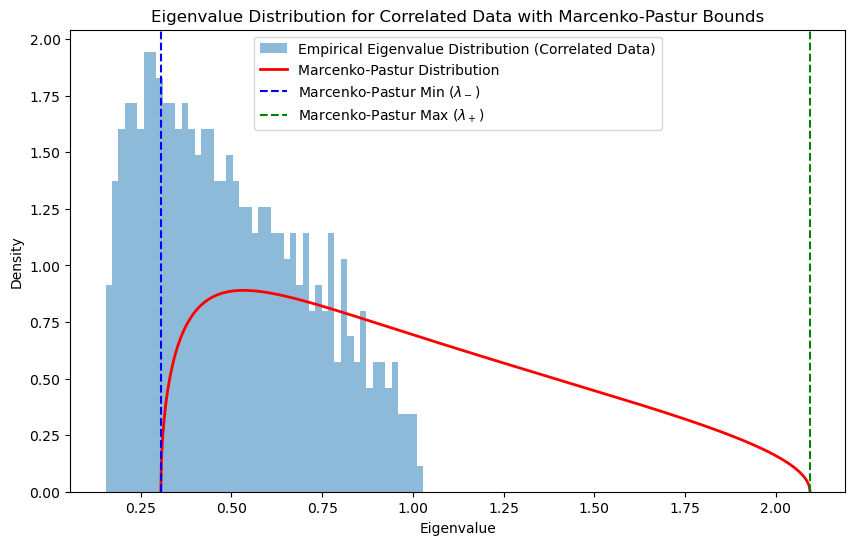

In [25]:
# Parameters
N = 500  # Number of time series
T = 2500  # Length of each time series
correlation_strength = 0.5  # Off-diagonal correlation strength
q = T / N  # Aspect ratio

# Generate correlated data
def generate_correlated_data(N, T, correlation_strength):
    correlation_matrix = (1 - correlation_strength) * np.eye(N) + correlation_strength * np.ones((N, N))
    mean = np.zeros(N)
    data = np.random.multivariate_normal(mean, correlation_matrix, size=T).T
    return data

# Generate data and calculate eigenvalues
correlated_data = generate_correlated_data(N, T, correlation_strength)
correlation_matrix = np.corrcoef(correlated_data)
eigenvalues = np.linalg.eigvalsh(correlation_matrix)

# Marcenko-Pastur bounds
lambda_min = (1 - np.sqrt(1 / q))**2
lambda_max = (1 + np.sqrt(1 / q))**2

# Generate Marcenko-Pastur distribution values for refined range
lambda_values = np.linspace(lambda_min, lambda_max, 1000)
marcenko_pastur_values = [marcenko_pastur_pdf(lmbd, q) for lmbd in lambda_values]

# Remove largest value ( Market Mode )
eigenvalues_without_largest = np.sort(eigenvalues)[:-1]

# Plot the eigenvalue distribution and Marcenko-Pastur distribution
plt.figure(figsize=(10, 6))
plt.hist(eigenvalues_without_largest, bins=50, density=True, alpha=0.5, label="Empirical Eigenvalue Distribution (Correlated Data)")
plt.plot(lambda_values, marcenko_pastur_values, color='red', lw=2, label="Marcenko-Pastur Distribution")
plt.axvline(lambda_min, color='blue', linestyle='--', label="Marcenko-Pastur Min ($\lambda_-$)")
plt.axvline(lambda_max, color='green', linestyle='--', label="Marcenko-Pastur Max ($\lambda_+$)")
plt.xlabel("Eigenvalue")
plt.ylabel("Density")
plt.title("Eigenvalue Distribution for Correlated Data with Marcenko-Pastur Bounds")
plt.legend()
plt.show()
